**_Maximum Likelihood Estimation_ (_MLE_)**
-
---

La estimación de máxima similitud (_MLE_ en inglés) permite calcular la densidad de una distribución probabilística.

#### **Elementos de un MLE**
* Escoger una distribución
    
    - Teniendo solo una muestra de los datos.
<br></br>
* Escoger los parámetros de la distribución
    
    - Que mejor se ajustan a la distribución

$$ P(X, \theta) = L(X;\theta) $$
Cálculo normal
$$ \max L(X;\theta) \rightarrow \max \prod_iP(X_i;\theta) $$
Cálculo en computadores con puntos flotantes finitos.
$$ \max \log L(X;\theta ) \rightarrow \max \sum_i \log P(X;\theta)$$

#### **Regresión Lineal**
$b_0$: _weight_

$b_1$: _bias_
$$ y = mx + b \Rightarrow h = b_0x + b_1 $$
$$ P(y|x) \rightarrow \max \sum_i \log P(y_1|x_1; h)$$

#### **Regresión Logística**
$$ \bar{X} = \beta_0·x_0 + \beta_1 · x_1 + ... + \beta_n·x_n $$
$$ h = \frac{1}{1+e^{(-\bar{X})}} $$
$$ L = {h_i·y_i}+(1-h_1)(1-y_i)$$
$$ P(y|x)\rightarrow \min (-1)·{\sum_i\left(L_{h_i \rightarrow log(h_1)} \right)}$$

#### **Ejemplo**


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

$$ \max\sum_i{\log P(y_i|x_i;h)} $$
Donde:

$y_i$: clase o categoría de cada elemento

$x_i$: son los atributos de cada elemento, donde además cada elemento del _dataset_ satisface la distribución de Bernoulli

La distribución de la similitud se da por la siguiente función $P$.
$$ P = \begin{cases}p,&\quad \text{si } y = 1 \\ 1-p, &\quad \text{si } y =0 \end{cases} $$
Cuya verosimilitud esta dada por :
$$ L=\hat{y_i}·y_i + (1-\hat{y_i})(1-y_i) $$



In [14]:
def likelihood(y, yp):
  return yp*y+(1-yp)*(1-y)

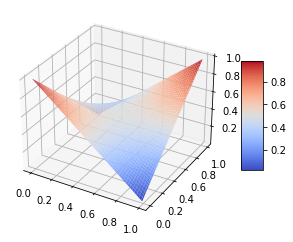

In [21]:
fig1, ax1 = plt.subplots(subplot_kw={'projection':'3d'})
Y = np.arange(0,1,0.01)
YP = np.arange(0,1,0.01)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)
surf1 = ax1.plot_surface(Y, YP, Z, cmap=cm.coolwarm)
plt.colorbar(surf1, shrink=0.5, aspect=5)
plt.show()

Considerando $ p \rightarrow log(p)$, y sumando la verosimilitud para todos los puntos del _dataset_ obtenemos:
$$ \max\sum_i\left({y·\log{\hat{y}} + (1-y)log(1-\hat{y})}\right)$$
$$ \text{CE} = \min\left(-\sum_i\left({y·\log{\hat{y}} + (1-y)log(1-\hat{y})}\right)\right)$$

##### **Regresión logística con Scikit-learn**

Recordemos que:

$$
\hat{y} = \frac{1}{1-e^{(-{\bar{x}})}}
$$

donde $\bar{x} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris: 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [27]:
## Con Sklearn
atrib_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X, y = load_iris(return_X_y=True)

In [29]:
clf = LogisticRegression(random_state=10, solver='liblinear')
clf.fit(X[:100], y[:100])

LogisticRegression(random_state=10, solver='liblinear')

In [32]:
clf.coef_
model_coefs = pd.DataFrame(clf.coef_, columns=atrib_names)
model_coefs

,sepal_length,sepal_width,petal_length,petal_width
0,-0.402474,-1.463829,2.237856,1.000093
